In [1]:
from mb_rag.basic import ModelFactory
llm = ModelFactory(model_name="gemini-3-pro-preview",model_type='google')


/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [3]:
from mb_rag.agents.seg_autolabel import create_bb_agent,SegmentationGraph

In [4]:
agent = create_bb_agent(llm.model,logging=False,langsmith_params=True)
graph_agent = SegmentationGraph(agent)

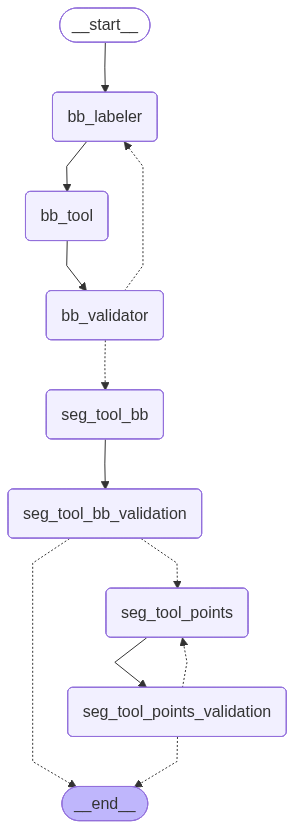

In [5]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

/home/malav/.local/lib/python3.11/site-packages/pydantic/v1/main.py:1048: UserWarning: LangSmith now uses UUID v7 for run and trace identifiers. This warning appears when passing custom IDs. Please use: from langsmith import uuid7
            id = uuid7()
Future versions will require UUID v7.
  input_data = validator(cls_, input_data)


respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "labeled_objects": [\n    {\n      "label": "scrambled eggs",\n      "box": [\n        0.191,\n        0.349,\n        0.763,\n        0.641\n      ],\n      "valid": false\n    }\n  ]\n}\n```', 'extras': {'signature': 'EswRCskRAXLI2nwS1mcr2WTBXn9XbDVFeEbppCwUhEWkYsvcuHOuFkNamdyXXjaULa3IBYB3NEdAX7aLDyqIITuJXRjFYUiKJbGJp/oVX0Bi9i7zv/JmTRTcisx4HIMjuoqu4dmUuoi1jaayOeWr+sp18Gd1qkSdYPFrddkghw0JrFXgRCEvM9mcO2X/qzV2Iz7JSsf+qg6Cz0eZjYr4on4567m1UWOyt65eDEOCh3dClmXH11PGRw0aZxMvQ7OIj6Zdw4lkXIvHEL+neijoFebwnOmfX8FDLOIoDWz0WS3OR71biV8lTd+43QRPsPeHC5yT9fENiUsoXc6kAtixcQk/FjkrJWfsTa+v1e7L8izHQaeQDo/+5QNMKp1VQqp1K9uuZVMTL6tEz2eCAGGtNo1l7R84gxGd56uPb2T2uKHeh1u6YcdPwTZRfnh+1S8nGiRpR9V07rGGjTWIlNYwiszasnkz4g0x2PX/nwXZqkIFReyEJVl4YWB6EZsSw24JxBD8Gf7tMbYDJ+vXOSCbfkUCYjI73iMNFrppdZM17RIzpesT12tgDfPWaVHqAaDImzu2KeWtp+ItZkVNVJIOReB0lGKKnzmOHgHZpdxguJwWztui6dgklCliTQsywsbhkl8+amx5S3tXdiugWhLbam5K+KoWidb46hCJF+6Jzliliq8ckD73kkxU5hd2A+fFtrBdYC9y

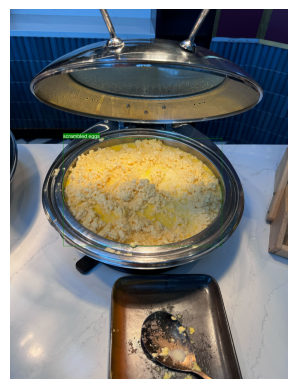

respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "bb_valid": true,\n  "failed_labels": []\n}\n```', 'extras': {'signature': 'Ev8MCvwMAXLI2nxfiUeaSV20u1oMgIPwe/KkB4v5xNz4ABBJPMFkLHXUYB+2UJqCQFTb9xeEps5QK7Vv0n33CEohpNoZ5//rTVq1hLlMcr4XGQ9QYGQJPMUQZokSiBVjvKuRdvn4RnKR14b7juWdOeVyxBWrvK3s47nLJfUnwjWzP7begC0TsXGIdFgdltQbYQapuS6BgHRoio4w8zgnGlCqgoJVHc5s3AynIV0cvvV2ey2xD0LrmMlA+GtmFJolYaNZHKtHaS3x7fKJcj+nPXaxuO+uQ9DT1rbbJA7m+wmeiYOtkEh7wSqgvPJcP2IY/BqujZv+lMyKl43LvkHiejLy0d9w+o16gxoH5smakNDkXRBQIHqTIXfsThE5wbyKzEE5xoNmZ+k33atLpTjvFZeC7yqZ/E5JAk14BWERDiR6/TCLvUZXuDHH5gdDQ6TiCrVSxYFOOGhhwZwpglxkQZnCEyxSDyMUn3t2en5c14ScJWJnRsuYZL5Wj3lQlyLOJEuyg28wLNbiw+tfM0tDsPjdUR52fiwI2I40280bFhzkzPnUEcbkue11PR57hQfRRTDmG2XIjKCwexLLLoz4jWDPtiLRSP9J1wBuWTzr/uAJcGzZkeiXcPlWXnPj0LbqFKgbV8kGX2kDCkoq7X4IGW3AJ8UW6jXmQceB3fkpFykFbA6kuZXmctvTEtrljmVnvEWYm/XqmrGAf/qgjIRJuH5KH3ygQBqb7sLbRUsAfW1u+tsHv+G0sS06yyIktRXhkwYAP43pLrgjoEFDusVw+Hdd++AUOezKv86YFkViIurauK9lx3liHkstxQ2jcVEmLJ4wGw5NVTn8DPpsHMUcH9zl

/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


Original bbox_data : {
  "labeled_objects": [
    {
      "label": "scrambled eggs",
      "box": [
        0.191,
        0.349,
        0.763,
        0.641
      ],
      "valid": false
    }
  ]
}
Modified bbox_data : [[0.191, 0.349, 0.763, 0.641]]
bbox_data : [[1993.4879999999998, 818.244, 3661.3920000000003, 3268.692]]


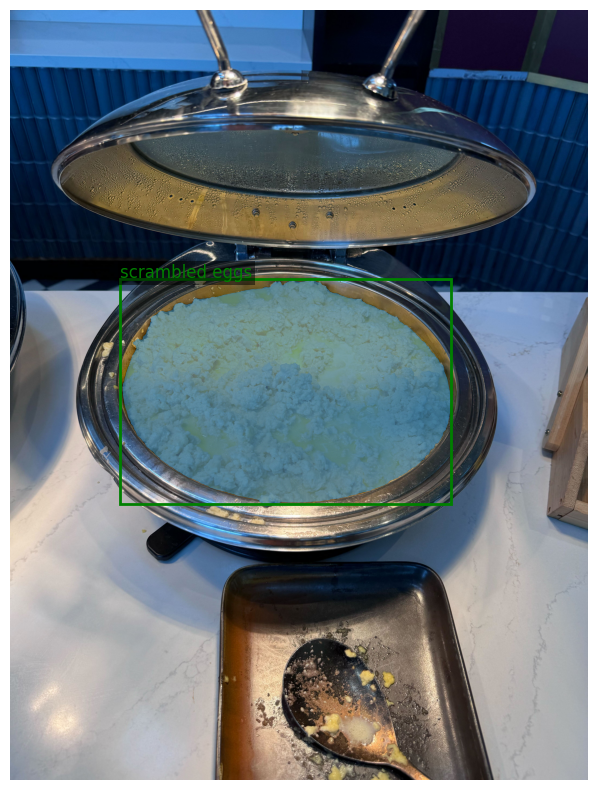

respone from LLM : content=[{'type': 'text', 'text': '{"seg_valid": true}', 'extras': {'signature': 'ErsQCrgQAXLI2nwqd3x70Nt1S/n+iIz1fdg1oVuV5pc09UR+BXdu7vFpfK7dvh8rw4gyFGiAz8s38VA2LTPWNPYauGdiaoCNbhK/tnZlOlsSwX7jmRzZrwPwGBXgSEoaT9PJoxf8WKuZ+S8QDUzY6pjiQOpT/16W8eSW+sOuPy7ahwdFdNMc7JFcsN+1y9yki5TOqiviwtwg+aky4t+FJWR3weSa4gfwsGJLjkHsst+tjKcx06NnvzJH8X85jq8TomDx6KzP1Fu15CINctKv2B+5y79v03G4fAUGvtim4nyuukIhwfj8G4GnfXE2K5EakxZL4LrgtiIJUB0QXxXtP6MBz+Y1vsUttBKxhi8om2EAXwAkMBLn/kCpZyDnegujG6/X7+M6i8+MEuZfokzclj5buhpadfQGR0NaVFjX+Ik0r8LlOQ5a64mX7sCwKytbL/PnYtXL8L9q3feggoGssbwlbZWpFD2NcTxduxNqLPkO8HCd2jkTWeN1a4D8H4FCdZU71DSdLlaflx78VA6A+r3Z/Ed/Qa/qAqyDvYbXHpwU12Vs5iN1wxEQO0cV2BIYJLXjzcb91HcqLel/ecS3bNHhn7lgYyFH4IdLi/KxGWH/fbnusg+aTcjcl7Pp63UfE6pI5KG6uNS8F+AFH6HqTZX/2VkD6G86xyAyX4i8A2wOQnPUHfRO8ihtEjh5y9yn5GsP9Zm5MBBfd6ubH8k+62MjWadUHEI4mtK8RMgQy9Ro+pQdS9DvMyZmZroRjhT1Asd+v340JK/08HRJZpYP3u8+vU1KvFMnLtJaL/dk/2panfbBws6W29FJtCSuhckTEcgz1IE7gvYECEJ+qwWtA+PZCVmtpVRhgmafNTuAzq5AHsP3LfzuEcD8W4sOhb8n2Ma

InvalidUpdateError: Expected dict, got True
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [6]:
graph_agent.run(image_path='./data/IMG_1827.jpg', query="Create a bounding box around scrambled eggs in the image.")

In [ ]:
from mb_rag.utils.extra import ImagePredictor

/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
a = ImagePredictor('./sam2_hiera_s.yaml','/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt')

/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [ ]:
a.set_image('./data/image.jpg')

In [ ]:
a.image.shape

(768, 1024, 3)

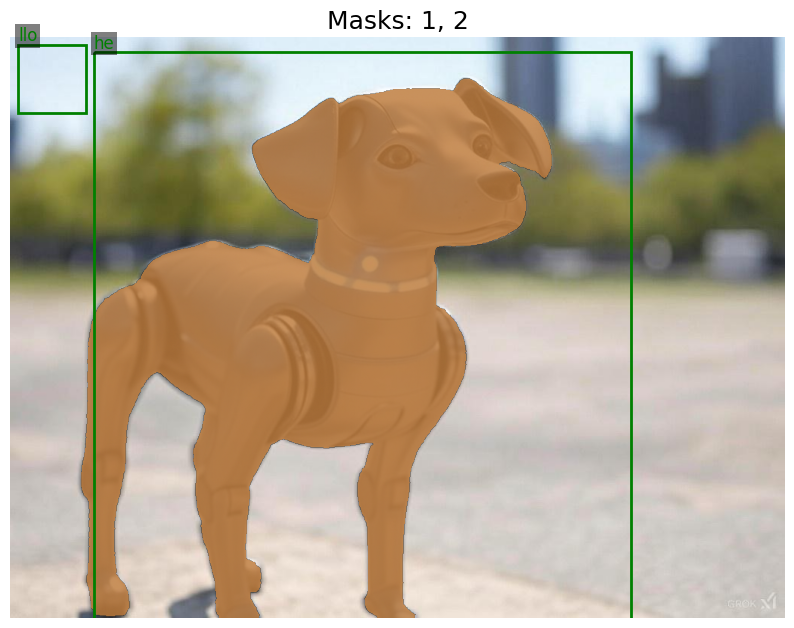

In [ ]:
mask,_,_ =a.predict_item(bbox=[[20, 110, 800, 820],[10,10,100,100]],labels_names=['he','llo']) 


(-0.5, 1023.5, 767.5, -0.5)

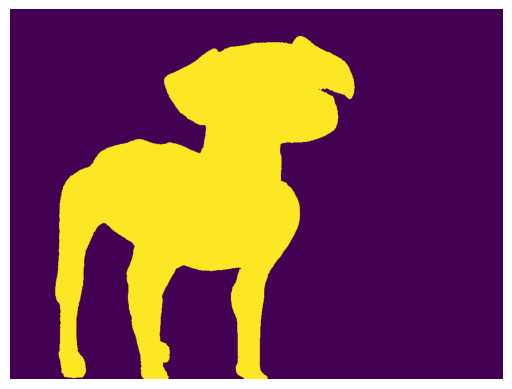

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mask_new = np.transpose(mask, (1, 2, 0))
plt.imshow(mask_new)
plt.axis('off')